In [86]:
#Import Statements

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import math

In [ ]:
#Exploratory Data Analysis 

In [90]:
df = pd.read_csv('../data/train.csv')
df.head(3)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0


In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.describe()

In [ ]:
df.loc[5]

In [ ]:
df.person_age.max()

In [ ]:
df.person_age.median()

In [ ]:
df.person_age.value_counts()

In [ ]:
sns.histplot(data=df, hue=df.loan_intent, x=df.loan_int_rate)

In [ ]:
sns.histplot(data=df, x=df.person_income,bins=50,binwidth=5,kde=True)


58000.0


<Axes: xlabel='person_income', ylabel='person_age'>

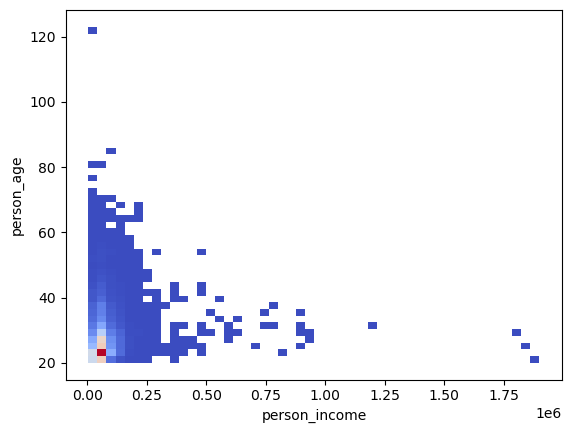

In [159]:
print(df.person_income.median())
sns.histplot(data=df, x=df.person_income,y=num_cols.person_age,bins=50,cmap='coolwarm')


In [106]:
df.person_home_ownership.value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [ ]:
#find outliers 

In [ ]:
sns.boxplot(data=df,x=df['person_age'],y=df['person_home_ownership'],color='r')


In [ ]:
'''This boxplot showcases the distribution of age when it comes to home ownership. We can see that across all categories the median age for individuals is between 20s and 30s, indicating most people in this dataset qualify as young adults. 
All the boxes of the boxplot are quite narrow implying that most people in each category are clustered around the same age. The outliers represent the much older population from the dataset. In conclusion there isnt a big difference between age groups when it comes to renting,owning, mortgaging or any other methods, all the groups seem to have similar central tendencies.'''

In [ ]:
sns.boxplot(data=df, y= df['loan_intent'],x=df['loan_amnt'],color='b')

In [ ]:
#Here we look at loan intent and loan amount. The median loan amount across all categories are mostly similar.Home Improvements have a slightly higher median than the others. Each category also includes outliers representing individuals who borrowed a higher amount than the median range. The IQR boxes are fairly simmilar among the different categories, not showing extreme variation in loan sizes. Overall loan amounts are relatively consistent around 10,000 to 15,000.

In [ ]:
x = df.drop('loan_status',axis=1)
y= df.loan_status

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
x_train_cat = encoder.fit_transform(x_train.select_dtypes(include='object'))
x_test_cat = encoder.transform(x_test.select_dtypes(include='object'))


In [ ]:
scaler = Normalizer()
x_train_num = scaler.fit_transform(x_train.select_dtypes(include=['float64','int64']))
x_test_num = scaler.transform(x_test.select_dtypes(include=['float64','int64']))


In [ ]:
x_train = np.hstack([x_train_cat,x_train_num])
x_test = np.hstack([x_test_cat,x_test_num])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier,'XGB Classifier': XGBClassifier(use_label_encoder=False,eval_metric = 'logloss')
from sklearn.neural_network import MLPClassifier

In [ ]:
models = {'Logistic Regression': LogisticRegression(penalty='l2',solver='saga'),'Random Forest Classifier' : RandomForestClassifier(n_estimators=100),'Gradient Boosting Classifier': GradientBoostingClassifier(),'MLP Classifier': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))}
for n,m in models.items():
    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
confusion = confusion_matrix(y_test,y_pred)
classification = classification_report(y_test,y_pred)
print('Accuracy:',accuracy,'\n','Precision', precision, '\n', 'Recall', recall, '\n', 'f1_score', f1, '\n', 'Confusion Matrix:',confusion ,'\n','Classification Report:', classification)

import os
from pathlib import Path

# 1️⃣ Create a proper .gitignore if it doesn't exist
gitignore_content = """
# --- Python cache / logs ---
__pycache__/
*.py[cod]
*.log
*.tmp
*.DS_Store

# --- Jupyter checkpoint folders ---
.ipynb_checkpoints/

# --- MLflow experiment tracking ---
mlruns/

# --- Virtual environments ---
venv/
.env/
.env*/

# --- Miscellaneous ---
*.sqlite
*.db
*.csv~
*.bak
*.swp
"""

with open(".gitignore", "w") as f:
    f.write(gitignore_content.strip() + "\n")

print("✅ .gitignore file created/updated.\n")

# 2️⃣ Remove unwanted files from git index if they were already tracked
os.system("git rm -r --cached mlruns .ipynb_checkpoints 2>nul")

# 3️⃣ Stage everything else cleanly
os.system("git add .")

# 4️⃣ Show what will be committed
print("📂 Files ready to commit:")
os.system("git status --short")
